### Edgar Moises Hernandez-Gonzalez
#### 02/04/20-03/04/20
#### Clasificacion de CIFAR10 con Fine Tuning usando VGG16
##### Esta es otra forma de hacer fine tuning
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 72.86%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [7]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=x_train.shape[1:])

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [9]:
for layer in base_model.layers:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7efe7d615ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7d64d630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7d64d978> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efe7cdcf320> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c578f28> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c5811d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efe7c58b4a8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c58b320> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c595668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7014c828> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efe70153748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
optimizer = Adam(lr=1e-4)
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
391/391 - 12s - loss: 2.1351 - accuracy: 0.2316 - val_loss: 1.8904 - val_accuracy: 0.3822
Epoch 2/100
391/391 - 11s - loss: 1.7914 - accuracy: 0.3839 - val_loss: 1.6488 - val_accuracy: 0.4543
Epoch 3/100
391/391 - 11s - loss: 1.6410 - accuracy: 0.4342 - val_loss: 1.5454 - val_accuracy: 0.4820
Epoch 4/100
391/391 - 11s - loss: 1.5573 - accuracy: 0.4610 - val_loss: 1.4795 - val_accuracy: 0.5006
Epoch 5/100
391/391 - 11s - loss: 1.5009 - accuracy: 0.4798 - val_loss: 1.4332 - val_accuracy: 0.5149
Epoch 6/100
391/391 - 11s - loss: 1.4615 - accuracy: 0.4926 - val_loss: 1.4026 - val_accuracy: 0.5212
Epoch 7/100
391/391 - 11s - loss: 1.4270 - accuracy: 0.5062 - val_loss: 1.3758 - val_accuracy: 0.5294
Epoch 8/100
391/391 - 11s - loss: 1.4049 - accuracy: 0.5119 - val_loss: 1.3570 - val_accuracy: 0.5340
Epoch 9/100
391/391 - 11s - loss: 1.3807 - accuracy: 0.5210 - val_loss: 1.3397 - val_accuracy: 0.5377
Epoch 10/100
391/391 - 11s - loss: 1.3596 - accuracy: 0.5283 - val_loss: 1.3247 - 

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 1.1333 - accuracy: 0.6040
Test loss: 1.1333348751068115
Test accuracy: 0.6039999723434448


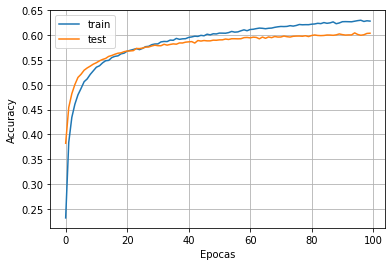

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

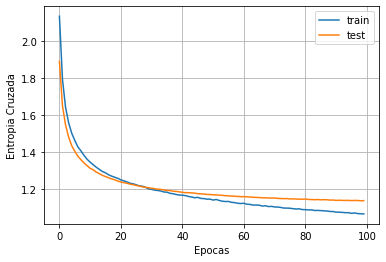

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [16]:
for layer in base_model.layers[15:]:
  layer.trainable = True

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7efe7d615ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7d64d630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7d64d978> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efe7cdcf320> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c578f28> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c5811d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efe7c58b4a8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c58b320> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7c595668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efe7014c828> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efe70153748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
391/391 - 17s - loss: 1.0401 - accuracy: 0.6372 - val_loss: 1.0989 - val_accuracy: 0.6164
Epoch 2/100
391/391 - 16s - loss: 1.0056 - accuracy: 0.6484 - val_loss: 1.0771 - val_accuracy: 0.6252
Epoch 3/100
391/391 - 16s - loss: 0.9838 - accuracy: 0.6561 - val_loss: 1.0602 - val_accuracy: 0.6309
Epoch 4/100
391/391 - 16s - loss: 0.9614 - accuracy: 0.6641 - val_loss: 1.0446 - val_accuracy: 0.6367
Epoch 5/100
391/391 - 16s - loss: 0.9427 - accuracy: 0.6710 - val_loss: 1.0320 - val_accuracy: 0.6417
Epoch 6/100
391/391 - 16s - loss: 0.9194 - accuracy: 0.6793 - val_loss: 1.0207 - val_accuracy: 0.6452
Epoch 7/100
391/391 - 16s - loss: 0.9077 - accuracy: 0.6827 - val_loss: 1.0099 - val_accuracy: 0.6483
Epoch 8/100
391/391 - 16s - loss: 0.8932 - accuracy: 0.6873 - val_loss: 1.0014 - val_accuracy: 0.6515
Epoch 9/100
391/391 - 16s - loss: 0.8790 - accuracy: 0.6924 - val_loss: 0.9930 - val_accuracy: 0.6531
Epoch 10/100
391/391 - 16s - loss: 0.8649 - accuracy: 0.6995 - val_loss: 0.9847 - 

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.8343 - accuracy: 0.7286
Test loss: 0.8343448042869568
Test accuracy: 0.728600025177002


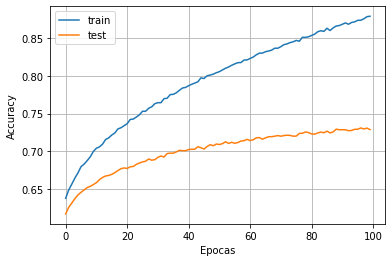

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

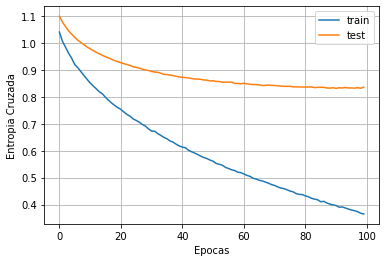

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [24]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[795  18  31  12  24   6   7  11  69  27]
 [ 25 804   6  18   6   6  12   3  27  93]
 [ 45   5 653  52  98  44  68  18   8   9]
 [ 11  14  57 558  61 137  84  30  19  29]
 [ 17   5  62  42 719  32  58  50  11   4]
 [ 10   8  45 179  59 593  38  51   1  16]
 [  6   7  41  52  47  33 796   2   8   8]
 [ 14   3  28  48  68  45  10 768   2  14]
 [ 75  36  10  18  12   2   6   1 819  21]
 [ 28  88   9  23   7   7  13  19  25 781]]


In [25]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1000
           1       0.81      0.80      0.81      1000
           2       0.69      0.65      0.67      1000
           3       0.56      0.56      0.56      1000
           4       0.65      0.72      0.68      1000
           5       0.66      0.59      0.62      1000
           6       0.73      0.80      0.76      1000
           7       0.81      0.77      0.79      1000
           8       0.83      0.82      0.82      1000
           9       0.78      0.78      0.78      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

